# **Experimentación TP3**

In [1]:
import numpy as np
import matplotlib as plt
import numpy.linalg as lng
from scipy.linalg import lu
from scipy import linalg
import networkx as nx
from scipy.stats.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import utils 
sns.set_style("whitegrid")

importing Jupyter notebook from utils.ipynb


Probando ejemplos

In [2]:
A = utils.leer_grafo('tests/test_aleatorio.txt')
utils.calcular_ranks('tests/test_aleatorio.txt', 0.76)

array([0.24074002, 0.21864311, 0.21864311, 0.24074002, 0.08123375])

# **GRAFOS PARTICULARES**

Supernodo

In [3]:
for i in range(10, 51, 10):
    S = utils.armar_grafo_supernodo(i)

Antisupernodo

In [4]:
for i in range(10, 51, 10):
    A = utils.armar_grafo_antisupernodo(i)

Supernodo al que le agregamos ejes

In [5]:
n = 10
p = 0.75
exp = utils.experimento_supernodo_le_agrego_ejes(n, p)

Anti-Supernodo al que le agregamos ejes

In [6]:
n = 10
p = 0.75
exp = utils.experimento_antisupernodo_le_agrego_ejes(n, p)

Clique

In [93]:
for i in range(10, 51, 10):
    clique = nx.to_numpy_array(nx.complete_graph(i))
    utils.generar_archivo_test_de_matriz("clique"+ str(i) +".txt", clique)

Binomial graph

In [142]:
for i in range(1, 9, 1):
    b = nx.binomial_graph(50, i/10, seed = 4, directed= True)
    binomial_graph = nx.to_numpy_array(b).T
    #print(np.mean(binomial_graph))
    utils.generar_archivo_test_de_matriz("binomial_graph50_" + str(i)+ ".txt", binomial_graph)

In [4]:
from scipy.stats import bernoulli
n = 50
edges = []
for i in range(1,  9, 1):
    p = i/10
    ber_trials = bernoulli.rvs(p, loc=0, size=n*n, random_state=None)
    A = np.array(ber_trials).reshape(n, n)

    edges.append(np.sum(A))
    utils.generar_archivo_test_de_matriz("binomial_graph50_" + str(i)+ ".txt", A)
    sol, den = utils.calcular_ranks_de_matriz(A, 0.60)
    print(den)

0.008
0.008
0.008000000000000002
0.008
0.008
0.007999999999999998
0.007999999999999998
0.008


Agrego filas completas a un grafo

In [6]:
n = 50
A = np.zeros(n*n).reshape(n,n)
for i in [10, 20, 30, 40, 50]:
    for j in range(0, i):
        for k in range(0, 50):
            if(j != k ):
                A[j][k] = 1 
    utils.generar_archivo_test_de_matriz("density50_" + str(i)+ ".txt", A)

## **Tiempos - test de la catedra**

Mediciones de tiempo tests de la catedra

In [9]:
utils.results_times("test_aleatorio.txt")

([0.024162016999999997, 0.030657515, 0.044978074],
 [0.000135123396286711, 0.000122808239773775, 0.001223475809412524])

## **Tiempos -nuestros grafos**

supernodo

In [126]:

supernodo10 = utils.read_results_time("test_supernodo_10.txtEG") + utils.read_results_time("test_supernodo_10.txtJac") + utils.read_results_time("test_supernodo_10.txtGS")

supernodo20 = utils.read_results_time("test_supernodo_20.txtEG") + utils.read_results_time("test_supernodo_20.txtJac") + utils.read_results_time("test_supernodo_20.txtGS")

supernodo30 = utils.read_results_time("test_supernodo_30.txtEG") + utils.read_results_time("test_supernodo_30.txtJac") + utils.read_results_time("test_supernodo_30.txtGS")

supernodo40 = utils.read_results_time("test_supernodo_40.txtEG") + utils.read_results_time("test_supernodo_40.txtJac") + utils.read_results_time("test_supernodo_40.txtGS")

supernodo50 = utils.read_results_time("test_supernodo_50.txtEG") + utils.read_results_time("test_supernodo_50.txtJac") + utils.read_results_time("test_supernodo_50.txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = supernodo10 + supernodo20 + supernodo30 + supernodo40 +supernodo50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

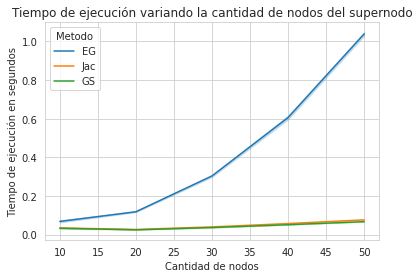

In [127]:

df = pd.DataFrame(data)

sns.set_palette("tab10")

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos del supernodo")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

antisupernodo

In [128]:
antisupernodo10 = utils.read_results_time("test_antisupernodo_10.txtEG") + utils.read_results_time("test_antisupernodo_10.txtJac") + utils.read_results_time("test_antisupernodo_10.txtGS")

antisupernodo20 = utils.read_results_time("test_antisupernodo_20.txtEG") + utils.read_results_time("test_antisupernodo_20.txtJac") + utils.read_results_time("test_antisupernodo_20.txtGS")

antisupernodo30 = utils.read_results_time("test_antisupernodo_30.txtEG") + utils.read_results_time("test_antisupernodo_30.txtJac") + utils.read_results_time("test_antisupernodo_30.txtGS")

antisupernodo40 = utils.read_results_time("test_antisupernodo_40.txtEG") + utils.read_results_time("test_antisupernodo_40.txtJac") + utils.read_results_time("test_antisupernodo_40.txtGS")

antisupernodo50 = utils.read_results_time("test_antisupernodo_50.txtEG") + utils.read_results_time("test_antisupernodo_50.txtJac") + utils.read_results_time("test_antisupernodo_50.txtGS")



metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = antisupernodo10 + antisupernodo20 + antisupernodo30 + antisupernodo40 + antisupernodo50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

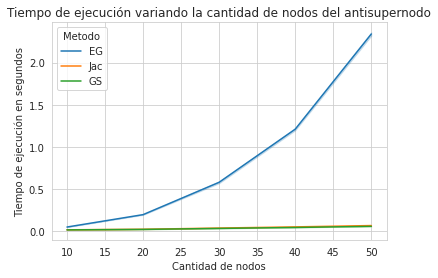

In [129]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos del antisupernodo")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

clique

In [130]:
clique10 = utils.read_results_time("clique10.txtEG") + utils.read_results_time("clique10.txtJac") + utils.read_results_time("clique10.txtGS")

clique20 = utils.read_results_time("clique20.txtEG") + utils.read_results_time("clique20.txtJac") + utils.read_results_time("clique20.txtGS")

clique30 = utils.read_results_time("clique30.txtEG") + utils.read_results_time("clique30.txtJac") + utils.read_results_time("clique30.txtGS")

clique40 = utils.read_results_time("clique40.txtEG") + utils.read_results_time("clique40.txtJac") + utils.read_results_time("clique40.txtGS")

clique50 = utils.read_results_time("clique50.txtEG") + utils.read_results_time("clique50.txtJac") + utils.read_results_time("clique50.txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = clique10 + clique20 + clique30 + clique40 + clique50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

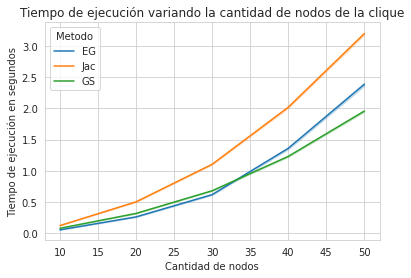

In [131]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos de la clique")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

In [149]:

cant_reps = 1000
resultados = []
densidad = []
for i in [1, 2, 3, 4, 5, 6]:
    n_edges= nx.number_of_edges(nx.binomial_graph(50, i/10, seed = 2, directed= True))
    densidad += [n_edges for j in range(0, 3*cant_reps)]
    resultados += utils.read_results_time("binomial_graph50_"+str(i)+".txtEG")
    resultados += utils.read_results_time("binomial_graph50_"+str(i)+".txtJac")
    resultados += utils.read_results_time("binomial_graph50_"+str(i)+".txtGS")

metodos = [i for k in range(0, 6) for i in ["EG", "Jac", "GS"] for j in range(0, cant_reps) ]

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

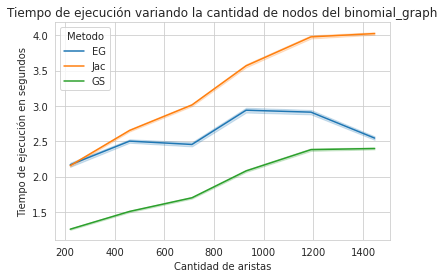

In [150]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos del binomial_graph")
plt.xlabel("Cantidad de aristas")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

In [12]:
cant_reps = 1000
resultados = []
densidad = []
for i in [10, 20, 30, 40, 50]:
    densidad += [i for j in range(0, 3*cant_reps)]
    resultados += utils.read_results_time("density50_"+str(i)+".txtEG")
    resultados += utils.read_results_time("density50_"+str(i)+".txtJac")
    resultados += utils.read_results_time("density50_"+str(i)+".txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, cant_reps) ]

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}


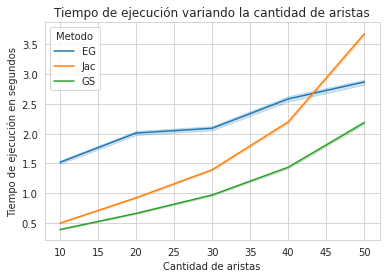

In [14]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de aristas")
plt.xlabel("Cantidad de aristas")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()